In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import tensorflow as tf

In [2]:
df = pd.read_csv('SolAtasIMC_tratado.csv')

Imprimimos la información general de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
 5   value   36400 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
tamanio = df.shape[0]

Creamos los conjuntos de entrenamiento, validación y test

In [5]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75
...,...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05,64


In [6]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close,value
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00,64
...,...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95,66


In [7]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close,value
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10,66
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15,66
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15,66
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05,66
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30,66
...,...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95,49
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75,49
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50,49
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25,49


Declaramos el modelo RandomForestRegressor

In [8]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

Preparamos los datos en el formato necesario para entrenar el algoritmo

In [9]:
X1 = []
y1= []
for i in range(0, df_train.shape[0] - 1):
    auxy = df_train.iloc[i + 1]
    y1.append(auxy.close)
    aux = df_train.iloc[i]
    aux1 = []
    for r in range(1, aux.size):
        aux1.append(aux[r])
    X1.append(aux1)

C:\Users\raulg\AppData\Local\Temp\ipykernel_18752\2244255699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Entrenamos el algoritmo

In [10]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

Probamos el algoritmo con los datos de validación

In [11]:
Vali1 = []
aux = df_vali.iloc[0]
for r in range (0,df_vali.shape[0] - 1):
    aux = df_vali.iloc[r]
    Vali1aux = []
    for i in range(1, aux.size):
        Vali1aux.append(aux[i])
    Vali1.append(Vali1aux)
predict = regr1.predict(Vali1)
print(predict)

C:\Users\raulg\AppData\Local\Temp\ipykernel_18752\3274649085.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Vali1aux.append(aux[i])


[ 22.1805  22.116   22.0085 ... 153.837  153.1125 155.9625]


In [12]:
Valirpr = []
for i in range(1,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)

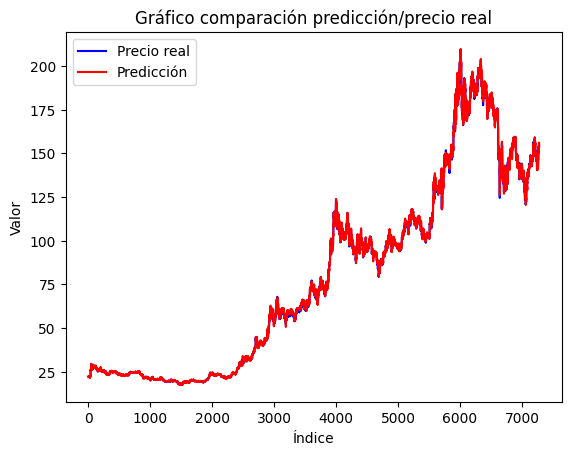

In [13]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [14]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.8113275540694354
El error medio porcentualemente es: 0.9670508918721916


Probamos el algoritmo con los datos de test

In [15]:
Test1 = []
aux = df_test.iloc[0]
for r in range (0,df_test.shape[0] - 1):
    aux = df_test.iloc[r]
    Test1aux = []
    for i in range(1, aux.size):
        Test1aux.append(aux[i])
    Test1.append(Test1aux)
predictT = regr1.predict(Test1)
print(predictT)

C:\Users\raulg\AppData\Local\Temp\ipykernel_18752\886282011.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Test1aux.append(aux[i])


[154.31   153.732  154.3395 ... 142.393  142.6115 142.779 ]


In [16]:
Testrpr = []
for i in range(1,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)

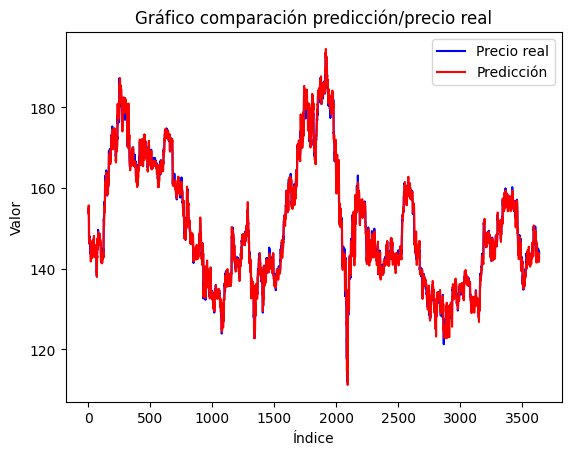

In [17]:
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predictT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [18]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - predictT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.1719781473336992
El error medio porcentualemente es: 0.7826227595698083


# Predicción Utilizando XGBoost

In [19]:
df_xgb = df.copy()
df_xgb['close_next'] = df_xgb['close'].shift(-1)

In [20]:
df_xgb = df_xgb.dropna()
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36399 entries, 0 to 36398
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        36399 non-null  object 
 1   open        36399 non-null  float64
 2   high        36399 non-null  float64
 3   low         36399 non-null  float64
 4   close       36399 non-null  float64
 5   value       36399 non-null  int64  
 6   close_next  36399 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [21]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36399

In [22]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

,date,open,high,low,close,value,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75,3.25
...,...,...,...,...,...,...,...
25475,2023-07-11 20:00:00,22.10,22.10,21.95,22.00,57,22.00
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57,21.95
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57,22.05


In [23]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

,date,open,high,low,close,value,close_next
25480,2023-07-12 01:00:00,22.05,22.15,22.00,22.10,64,22.15
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64,22.10
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64,22.00
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64,21.95
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64,22.00
...,...,...,...,...,...,...,...
32755,2024-05-10 04:00:00,153.40,153.80,152.70,153.65,66,153.95
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66,153.75
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66,153.30
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66,154.95


In [24]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

,date,open,high,low,close,value,close_next
32760,2024-05-10 09:00:00,154.95,155.75,154.25,154.35,66,154.10
32761,2024-05-10 10:00:00,154.35,154.50,153.45,154.10,66,154.15
32762,2024-05-10 11:00:00,154.10,154.80,153.25,154.15,66,154.15
32763,2024-05-10 12:00:00,154.15,154.30,153.25,154.15,66,155.05
32764,2024-05-10 13:00:00,154.15,155.20,153.00,155.05,66,153.30
...,...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,49,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,49,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,49,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,49,144.25


Definimos los datos y características del entrenamiento

In [25]:
X = df_train_xgb[['open', 'high', 'low', 'close']] 
y = df_train_xgb['close_next']
X1 = df_vali_xgb[['open', 'high', 'low', 'close']] 
y1 = df_vali_xgb['close_next']

In [26]:
dtrain = xgb.DMatrix(data=X, label=y)
dvali = xgb.DMatrix(data=X1, label=y1)

In [27]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

Entrenamos el modelo XGBoost

In [28]:
bst = xgb.train(param, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=10)

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938
[71]	train-rmse:1.03808	validacion-rmse:1.50983


Lo probamos con los datos de validación

In [29]:
predict_xgb = bst.predict(dvali)

In [30]:
Valirpr_xgb = []
for i in range(0,df_vali_xgb.shape[0]):
    Valirpr_xgb.append(df_vali_xgb.iloc[i].close)

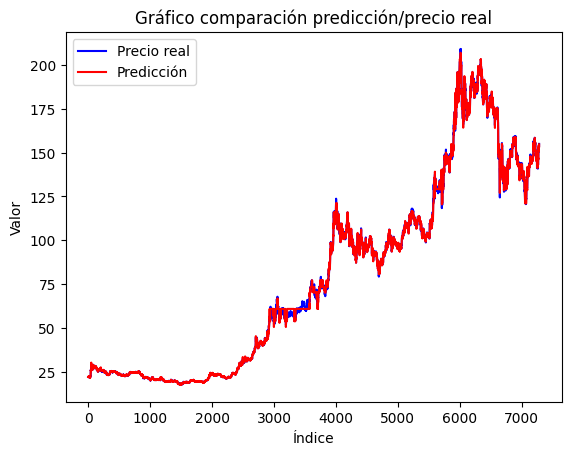

In [31]:
plt.plot(Valirpr_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [32]:
suma = 0
n = len(Valirpr_xgb)
mae = np.mean(np.abs(Valirpr_xgb - predict_xgb))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb[i] - Valirpr_xgb[i])/Valirpr_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.5122382410279995
El error medio porcentualemente es: 0.6814544222019102


Preparamos los datos de test en el formato necesario

In [33]:
df_test_xgb_aux = df_test_xgb.iloc[:-1].copy()
X_test = df_test_xgb_aux[['open', 'high', 'low', 'close']] 
y_test = df_test_xgb_aux['close_next']
dtest = xgb.DMatrix(data=X_test, label=y_test)

Lo probamos con los datos de test

In [34]:
predict_xgb_test = bst.predict(dtest)

In [35]:
Test_xgb = []
for i in range(1,df_test_xgb.shape[0]):
    Test_xgb.append(df_test_xgb.iloc[i].close)

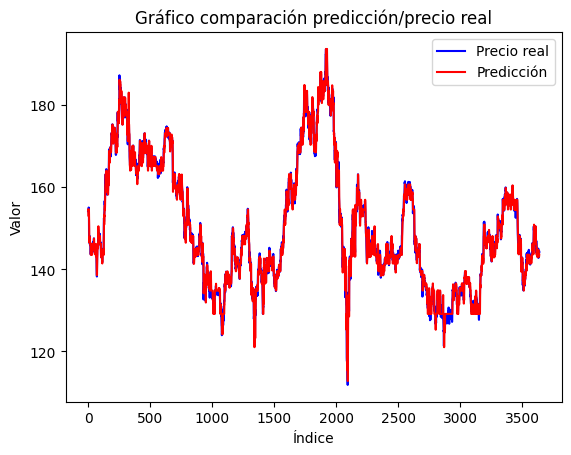

In [36]:
plt.plot(Test_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb_test, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [37]:
suma = 0
n = len(Test_xgb)
mae = np.mean(np.abs(Test_xgb - predict_xgb_test))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0809644047934774
El error medio porcentualemente es: 0.7275942239749614


# Entrenamos un modelo de red neuronal

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [39]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 3])  
    return np.array(X), np.array(y)
df_train_aux = df_train[['open', 'high', 'low', 'close', 'value']].values
X_train, y_train= create_sequences(df_train_aux, 7)
X_train

array([[[ 3.1 ,  3.35,  3.1 ,  3.25, 75.  ],
        [ 3.25,  3.25,  3.15,  3.15, 75.  ],
        [ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        ...,
        [ 3.25,  3.25,  3.2 ,  3.25, 75.  ],
        [ 3.25,  3.3 ,  3.15,  3.25, 75.  ],
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ]],

       [[ 3.25,  3.25,  3.15,  3.15, 75.  ],
        [ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 , 75.  ],
        ...,
        [ 3.25,  3.3 ,  3.15,  3.25, 75.  ],
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ],
        [ 3.35,  3.55,  3.35,  3.45, 75.  ]],

       [[ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.25,  3.25,  3.2 ,  3.25, 75.  ],
        ...,
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ],
        [ 3.35,  3.55,  3.35,  3.45, 75.  ],
        [ 3.45,  3.7 ,  3.4 ,  3.7 , 75.  ]],

       ...,

       [[22.1 , 22.4 , 21.95, 22.2 , 57.  ],
        [22.2 , 22.25, 21.9 , 22.15, 57.  ],
        [22.15, 22.2 , 21.95, 22.1 , 57.  

In [40]:
df_vali_aux = df_vali[['open', 'high', 'low', 'close', 'value']].values
X_vali, y_vali= create_sequences(df_vali_aux, 7)
X_vali

array([[[ 22.1 ,  22.3 ,  22.05,  22.15,  64.  ],
        [ 22.15,  22.25,  22.1 ,  22.1 ,  64.  ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        ...,
        [ 21.95,  22.05,  21.9 ,  22.  ,  64.  ],
        [ 22.  ,  22.1 ,  22.  ,  22.05,  64.  ],
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ]],

       [[ 22.15,  22.25,  22.1 ,  22.1 ,  64.  ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95,  64.  ],
        ...,
        [ 22.  ,  22.1 ,  22.  ,  22.05,  64.  ],
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.15,  22.  ,  22.05,  64.  ]],

       [[ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95,  64.  ],
        [ 21.95,  22.05,  21.9 ,  22.  ,  64.  ],
        ...,
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.15,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.05,  21.95,  22.05,  64.  ]],

       ...,

       [[150.35, 153.4 , 150.15, 152.95,  

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(35,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
X_trainR = []
for i in X_train:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_trainR.append(aux)       
X_trainR = np.array(X_trainR)  

In [43]:
X_valiR = []
for i in X_vali:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_valiR.append(aux)  
X_valiR = np.array(X_valiR)

In [44]:
history = model.fit(X_trainR, y_train, epochs=15, batch_size=96, validation_data=(X_valiR, y_vali), shuffle=False)

Epoch 1/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 33.6146 - val_loss: 33.6334
Epoch 2/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 45.2116 - val_loss: 16.1476
Epoch 3/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 56.5130 - val_loss: 8.0239
Epoch 4/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 15.4768 - val_loss: 3.6065
Epoch 5/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 9.9462 - val_loss: 2.0464
Epoch 6/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 13.5406 - val_loss: 6.2386
Epoch 7/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 9.4698 - val_loss: 19.7515
Epoch 8/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 12.6344 - val_loss: 19.8779
Epoch 9/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 13.6833 - val_loss: 16.7768
Epoch 10/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 21.7613 - val_loss: 5.6659
Epoch 11/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 24.8414 - val_loss: 6.4804
Epoch 12/15
266/

In [45]:
y_pred = model.predict(X_valiR)
y_pred

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


array([[ 22.700974],
       [ 22.683266],
       [ 22.660254],
       ...,
       [144.71791 ],
       [144.67497 ],
       [145.22908 ]], dtype=float32)

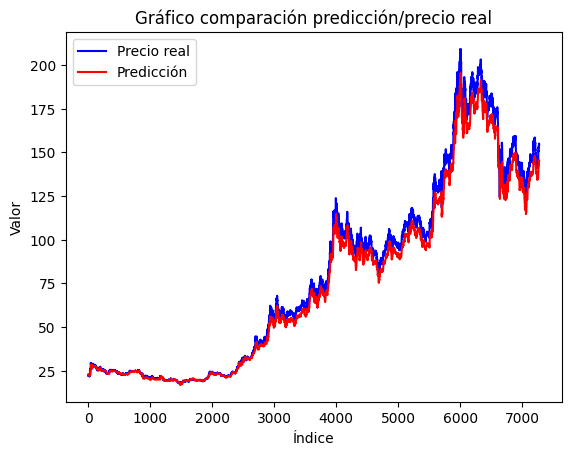

In [46]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_pred, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [47]:
y_pred_aux=[]
for elem in y_pred:
    y_pred_aux.append(elem[0])
y_pred_aux = np.array(y_pred_aux)

In [48]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_aux))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 4.384830565906925
El error medio porcentualemente es: 4.438365538199362


In [49]:
df_test_aux = df_test[['open', 'high', 'low', 'close', 'value']].values
X_test, y_test= create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ,  66.  ],
        [154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ]],

       [[154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        ...,
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ]],

       [[154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ],
        [146.95, 148.8 , 145.15, 148.  ,  66.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05,  

In [50]:
X_testR = []
for i in X_test:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_testR.append(aux)       
X_testR = np.array(X_testR) 

In [51]:
y_predT = model.predict(X_testR)
y_predT

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


array([[144.42924],
       [141.54214],
       [140.40202],
       ...,
       [135.42769],
       [135.72667],
       [136.03008]], dtype=float32)

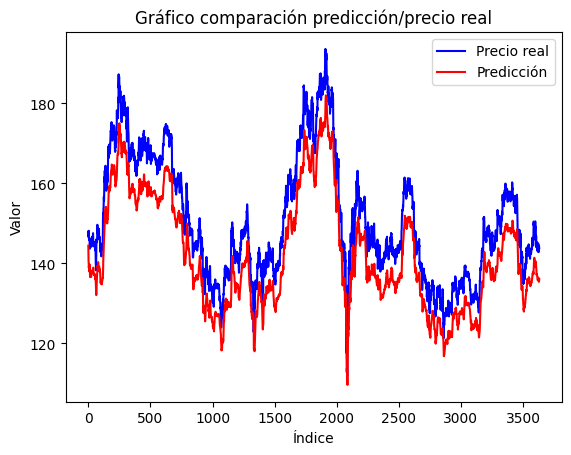

In [52]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [53]:
y_pred_auxT=[]
for elem in y_predT:
    y_pred_auxT.append(elem[0])
y_pred_auxT = np.array(y_pred_auxT)

In [54]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 8.336874850941124
El error medio porcentualemente es: 5.520499054353245


In [ ]:
#model.save('mi_modelo_densoIMC3_96.h5')

In [56]:
def eval(Valirpr, y_pred_aux):
    suma = 0
    n = len(Valirpr)
    for i in range(0,n):
        suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [57]:
def rpr_prep(df):
    Testrpr = []
    for i in range(7,df.shape[0]):
        Testrpr.append(df.iloc[i].close)
    return Testrpr

In [58]:
def y_aux_prep(y_predT):
    y_pred_auxT=[]
    for elem in y_predT:
        y_pred_auxT.append(elem[0])
    y_pred_auxT = np.array(y_pred_auxT)
    return y_pred_auxT

In [59]:
def trainDenso(model, X_trainR, y_train, X_valiR, y_vali, X_testR):
    mejor_valor = 100.0
    for e in range(1, 30):
        for b in range(1,256):
            for i in range(0, 50):
                history = model.fit(X_trainR, y_train, epochs=e, batch_size=b, validation_data=(X_valiR, y_vali), shuffle=False)
                y_pred = model.predict(X_testR)
                valor = eval(rpr_prep(df_test), y_aux_prep(y_pred))
                if valor < mejor_valor and valor < 1.0:
                    mejor_valor = valor
                    stri = "modelos_densos\mi_modelo_densoICM" + str(e) + "_" + str(b) + "_" + str(round(valor, 4)) + ".h5"
                    model.save(stri)

# Entrenamos un modelo LSTM

In [60]:
from tensorflow.keras.layers import LSTM

In [61]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation='relu', input_shape=(7, 5)))
modelLSTM.add(Dense(1))

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
modelLSTM.compile(optimizer='adam', loss='mape')

In [63]:
historyLSTM = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_vali, y_vali), shuffle=False)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11.0310 - val_loss: 5.2498
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.2526 - val_loss: 3.6754
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8084 - val_loss: 4.1937
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.2715 - val_loss: 5.1996
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0023 - val_loss: 4.7456
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.2969 - val_loss: 2.2989
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.0531 - val_loss: 5.2862
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.9256 - val_loss: 5.6532
Epoch 9/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3434 - val_loss: 6.2539
Epoch 10/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4595 - val_loss: 3.0564


In [64]:
y_predLSTM = modelLSTM.predict(X_vali)
y_predLSTM

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 22.167841],
       [ 22.17166 ],
       [ 22.149292],
       ...,
       [148.19757 ],
       [147.32751 ],
       [149.51529 ]], dtype=float32)

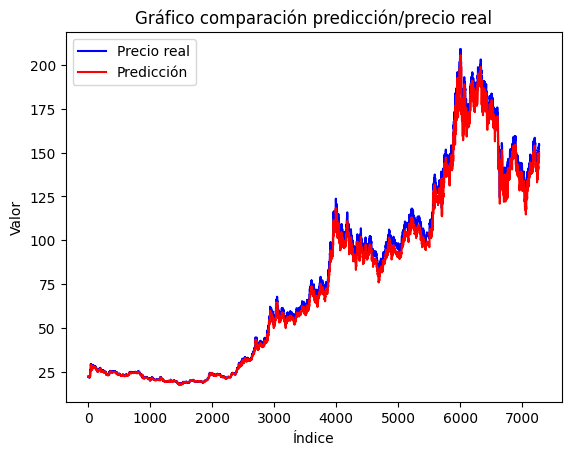

In [65]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTM, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [66]:
y_pred_auxLSTM=[]
for elem in y_predLSTM:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [67]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 3.0411879671795177
El error medio porcentualemente es: 3.0564422218392946


Probamos los datos de test

In [68]:
df_test_aux = df_test[['open', 'high', 'low', 'close', 'value']].values
X_test, y_test = create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ,  66.  ],
        [154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ]],

       [[154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        ...,
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ]],

       [[154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ],
        [146.95, 148.8 , 145.15, 148.  ,  66.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05,  

In [69]:
y_predLSTMt = modelLSTM.predict(X_test)
y_predLSTMt

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


array([[141.73935],
       [138.24713],
       [140.69339],
       ...,
       [138.29184],
       [139.25269],
       [138.8168 ]], dtype=float32)

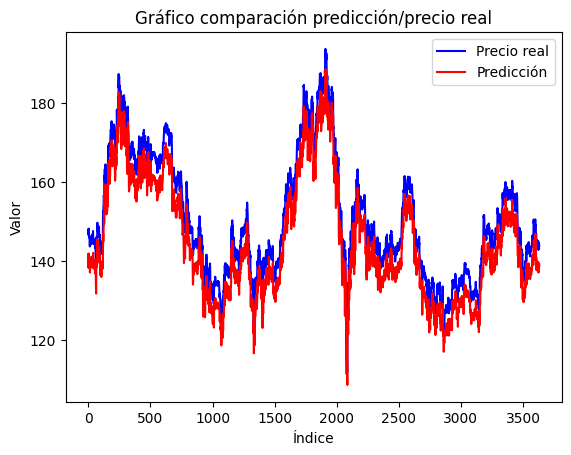

In [70]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTMt, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [71]:
y_pred_auxLSTM=[]
for elem in y_predLSTMt:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [72]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 5.666565995489448
El error medio porcentualemente es: 3.7825047684562567


In [73]:
#modelLSTM.save('mi_modelo_lstmICM10_32.h5')

In [74]:
def eval(Valirpr, y_pred_aux):
    suma = 0
    n = len(Valirpr)
    for i in range(0,n):
        suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [75]:
def rpr_prep(df):
    Testrpr = []
    for i in range(7,df.shape[0]):
        Testrpr.append(df.iloc[i].close)
    return Testrpr

In [76]:
def y_aux_prep(y_predLSTMt):
    y_pred_auxLSTM=[]
    for elem in y_predLSTMt:
        y_pred_auxLSTM.append(elem[0])
    y_pred_auxLSTM = np.array(y_pred_auxLSTM)
    return y_pred_auxLSTM

In [79]:
def trainLSTM(modelLSTM, X_train, y_train, X_vali, y_vali, X_test):
    mejor_valor = 100.0
    for e in range(3, 30):
        for b in range(4,256):
            for i in range(0, 25):
                historyLSTM = modelLSTM.fit(X_train, y_train, epochs=e, batch_size=b, validation_data=(X_vali, y_vali), shuffle=False)
                y_predLSTM = modelLSTM.predict(X_test)
                valor = eval(rpr_prep(df_test), y_aux_prep(y_predLSTM))
                if valor < mejor_valor and valor < 1.0:
                    mejor_valor = valor
                    stri = "modelos_lstm\mi_modelo_lstmICM" + str(e) + "_" + str(b) + "_" + str(round(valor, 4)) + ".h5"
                    modelLSTM.save(stri)
                    
    
    
    
        
    

In [80]:
trainLSTM(modelLSTM, X_train, y_train, X_vali, y_vali, X_test)

Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.2453 - val_loss: 4.9477
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.7259 - val_loss: 4.4435
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.7099 - val_loss: 3.3490
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.3229 - val_loss: 3.5366
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 2.7426 - val_loss: 3.0821
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.8320 - val_loss: 3.0218
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.7206 - val_loss: 2.4756
Epoch 2/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.6063 - val_loss: 3.0037
Epoch 3/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.6801 - val_loss: 2.9658
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Epoch 1/3
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 2.9623 - val_loss: 2.8766
E

Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1560 - val_loss: 2.6274
Epoch 2/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.9493 - val_loss: 3.0312
Epoch 3/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.9426 - val_loss: 3.0970
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9380 - val_loss: 3.2247
Epoch 2/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9054 - val_loss: 3.3054
Epoch 3/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9301 - val_loss: 3.2549
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0394 - val_loss: 2.0157
Epoch 2/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9469 - val_loss: 2.7906
Epoch 3/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.8918 - val_loss: 3.2418
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
Epoch 1/3
4246/4246 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0394 - val_loss: 3.3244
E

Epoch 1/3
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7734 - val_loss: 0.7962
Epoch 2/3
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7584 - val_loss: 0.8089
Epoch 3/3
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7475 - val_loss: 0.9659
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
Epoch 1/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7562 - val_loss: 1.0046
Epoch 2/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7782 - val_loss: 0.9976
Epoch 3/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8177 - val_loss: 1.0027
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
Epoch 1/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8347 - val_loss: 0.9769
Epoch 2/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8158 - val_loss: 1.0630
Epoch 3/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7749 - val_loss: 1.0021
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
Epoch 1/3
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8488 - val_loss: 1.0209
E

Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5981 - val_loss: 0.8445
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6105 - val_loss: 0.8468
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5958 - val_loss: 0.8383
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6716 - val_loss: 0.8332
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5364 - val_loss: 0.8530
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6693 - val_loss: 0.8527
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6591 - val_loss: 0.8470
Epoch 2/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6980 - val_loss: 0.8493
Epoch 3/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6341 - val_loss: 0.8500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6818 - val_loss: 0.8525
Epoch 2/3
490/490 ━━━

Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7679 - val_loss: 0.8376
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7386 - val_loss: 0.8173
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6305 - val_loss: 0.8377
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6659 - val_loss: 0.8359
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6359 - val_loss: 0.8186
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5818 - val_loss: 0.8086
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5323 - val_loss: 0.8034
Epoch 2/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4914 - val_loss: 0.8001
Epoch 3/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6250 - val_loss: 0.8041
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
Epoch 1/3
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5077 - val_loss: 0.8119
Epoch 2/3
455/455 ━━━

Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5274 - val_loss: 0.8020
Epoch 2/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4373 - val_loss: 0.8076
Epoch 3/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5240 - val_loss: 0.8070
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5104 - val_loss: 0.8004
Epoch 2/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5119 - val_loss: 0.8024
Epoch 3/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4722 - val_loss: 0.8012
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4744 - val_loss: 0.8005
Epoch 2/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4471 - val_loss: 0.8048
Epoch 3/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5734 - val_loss: 0.8041
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
Epoch 1/3
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4735 - val_loss: 0.8039
Epoch 2/3
432/432 ━━━

Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4770 - val_loss: 0.8112
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6127 - val_loss: 0.8015
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4788 - val_loss: 0.8342
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6753 - val_loss: 0.8090
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4607 - val_loss: 0.8320
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4941 - val_loss: 2.3085
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9567 - val_loss: 0.9486
Epoch 2/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4095 - val_loss: 0.8109
Epoch 3/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0413 - val_loss: 0.8681
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
Epoch 1/3
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9044 - val_loss: 0.9293
Epoch 2/3
399/399 ━━━

Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3872 - val_loss: 0.7782
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4404 - val_loss: 0.7690
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4106 - val_loss: 0.7669
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4781 - val_loss: 0.7647
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4432 - val_loss: 0.7668
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4588 - val_loss: 0.7721
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4530 - val_loss: 0.7702
Epoch 2/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4635 - val_loss: 0.7767
Epoch 3/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4329 - val_loss: 0.7782
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
Epoch 1/3
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4910 - val_loss: 0.7698
Epoch 2/3
392/392 ━━━

Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3840 - val_loss: 0.7502
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3956 - val_loss: 0.7504
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5197 - val_loss: 0.7513
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4727 - val_loss: 0.7575
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4077 - val_loss: 0.7623
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4051 - val_loss: 0.7551
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3808 - val_loss: 0.7515
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3872 - val_loss: 0.7530
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3703 - val_loss: 0.7540
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4082 - val_loss: 0.7524
Epoch 2/3
327/327 ━━━

Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4233 - val_loss: 0.7586
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4103 - val_loss: 0.7572
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4185 - val_loss: 0.7533
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4411 - val_loss: 0.7756
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4573 - val_loss: 0.7623
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4194 - val_loss: 0.7574
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
Epoch 1/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3814 - val_loss: 0.7541
Epoch 2/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3948 - val_loss: 0.7541
Epoch 3/3
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4292 - val_loss: 0.7539
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
Epoch 1/3
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4895 - val_loss: 0.7926
Epoch 2/3
323/323 ━━━

KeyboardInterrupt: 